In [3]:
import h5py
import pandas as pd
from pathlib import Path
import re
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy.signal

In [5]:
testpath = Path("/home/matthias/Videos/track_example/maze0/maze0_tracked_fly.000_maze0.analysis.h5")

In [6]:
#TEST WITH ONE VIDEO 
testpath = Path("/home/matthias/Videos/track_example/maze0") #CHANGE HERE 

with h5py.File(testpath.as_posix(), "r") as f:
            dset_names = list(f.keys())
            locs = f["tracks"][:].T
            node_names = [n.decode() for n in f["node_names"][:]]

In [7]:
locs

array([[[[ 74.19460297],
         [434.22024536]],

        [[ 67.70566559],
         [415.44824219]],

        [[ 61.34701538],
         [401.74899292]]],


       [[[ 74.06576538],
         [434.68179321]],

        [[ 67.65240479],
         [418.22714233]],

        [[ 61.35403824],
         [402.22640991]]],


       [[[ 74.21992493],
         [434.78063965]],

        [[ 67.74382782],
         [418.3352356 ]],

        [[ 61.40270233],
         [402.34411621]]],


       ...,


       [[[151.70970154],
         [ 35.60498428]],

        [[170.41453552],
         [ 41.77960205]],

        [[186.53562927],
         [ 45.24257278]]],


       [[[151.81039429],
         [ 35.59921646]],

        [[170.37174988],
         [ 41.91687393]],

        [[184.07774353],
         [ 45.65935516]]],


       [[[154.47328186],
         [ 35.64250183]],

        [[170.81877136],
         [ 42.03455353]],

        [[186.8349762 ],
         [ 45.85036469]]]])

In [10]:
locs[2]

array([[[ 74.21992493],
        [434.78063965]],

       [[ 67.74382782],
        [418.3352356 ]],

       [[ 61.40270233],
        [402.34411621]]])

In [11]:
videopath = Path("/home/matthias/Videos/track_example/maze0/maze0.mp4")

In [72]:
# List all video files in the directory and subdirectories
input = Path("/home/matthias/Videos/Alice_Samara_Videos2")

videos = list(input.rglob("*.h5"))

videos

[PosixPath('/home/matthias/Videos/Alice_Samara_Videos2/mazes_experiment5_Videos/arena2/maze0/maze0_tracked_fly.000_maze0.analysis.h5'),
 PosixPath('/home/matthias/Videos/Alice_Samara_Videos2/mazes_experiment5_Videos/arena2/maze1/maze1_tracked_fly.000_maze1.analysis.h5'),
 PosixPath('/home/matthias/Videos/Alice_Samara_Videos2/mazes_experiment5_Videos/arena2/maze2/maze2_tracked_fly.000_maze2.analysis.h5'),
 PosixPath('/home/matthias/Videos/Alice_Samara_Videos2/mazes_experiment5_Videos/arena7/maze0/maze0_tracked_fly.000_maze0.analysis.h5'),
 PosixPath('/home/matthias/Videos/Alice_Samara_Videos2/mazes_experiment5_Videos/arena7/maze1/maze1_tracked_fly.000_maze1.analysis.h5'),
 PosixPath('/home/matthias/Videos/Alice_Samara_Videos2/mazes_experiment5_Videos/arena7/maze2/maze2_tracked_fly.000_maze2.analysis.h5'),
 PosixPath('/home/matthias/Videos/Alice_Samara_Videos2/mazes_experiment5_Videos/arena1/maze0/maze0_tracked_fly.000_maze0.analysis.h5'),
 PosixPath('/home/matthias/Videos/Alice_Samara_V

In [62]:
videopath.parent.name

'maze0'

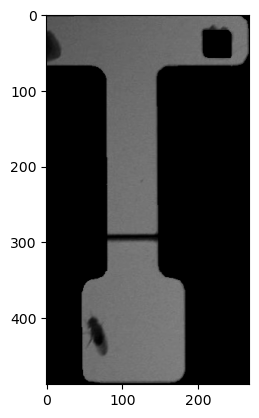

In [12]:
# Get first frame
import cv2
cap = cv2.VideoCapture(videopath.as_posix())
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
ret, frame = cap.read()
cap.release()

# Display first frame
import matplotlib.pyplot as plt
plt.imshow(frame)

In [35]:
# Get abdomen location

abdomen = locs[0][1]

abdomen

array([[ 67.70566559],
       [415.44824219]])

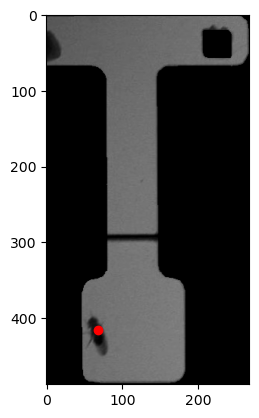

In [36]:
# Add abdomen to frame
plt.imshow(frame)
plt.scatter(abdomen[0], abdomen[1], c="red")

In [39]:
# Get all head locations

heads = locs[2]

heads

array([[[ 74.21992493],
        [434.78063965]],

       [[ 67.74382782],
        [418.3352356 ]],

       [[ 61.40270233],
        [402.34411621]]])

In [41]:
locs.T

array([[[[ 74.19460297,  74.06576538,  74.21992493, ..., 151.70970154,
          151.81039429, 154.47328186],
         [ 67.70566559,  67.65240479,  67.74382782, ..., 170.41453552,
          170.37174988, 170.81877136],
         [ 61.34701538,  61.35403824,  61.40270233, ..., 186.53562927,
          184.07774353, 186.8349762 ]],

        [[434.22024536, 434.68179321, 434.78063965, ...,  35.60498428,
           35.59921646,  35.64250183],
         [415.44824219, 418.22714233, 418.3352356 , ...,  41.77960205,
           41.91687393,  42.03455353],
         [401.74899292, 402.22640991, 402.34411621, ...,  45.24257278,
           45.65935516,  45.85036469]]]])

In [42]:
HEAD_INDEX = 2
THORAX_INDEX = 1
ABDO_INDEX = 0

head_loc = locs[:, HEAD_INDEX, :, :]
thorax_loc = locs[:, THORAX_INDEX, :, :]
abdo_loc = locs[:, ABDO_INDEX, :, :]

In [43]:
abdo_loc

array([[[ 74.19460297],
        [434.22024536]],

       [[ 74.06576538],
        [434.68179321]],

       [[ 74.21992493],
        [434.78063965]],

       ...,

       [[151.70970154],
        [ 35.60498428]],

       [[151.81039429],
        [ 35.59921646]],

       [[154.47328186],
        [ 35.64250183]]])

In [48]:


head_loc[:, 0].flatten()

array([ 61.34701538,  61.35403824,  61.40270233, ..., 186.53562927,
       184.07774353, 186.8349762 ])

In [50]:
# Build DataFrame with all locations

df = pd.DataFrame(
    {
        "head_x": head_loc[:, 0].flatten(),
        "head_y": head_loc[:, 1].flatten(),
        "thorax_x": thorax_loc[:, 0].flatten(),
        "thorax_y": thorax_loc[:, 1].flatten(),
        "abdo_x": abdo_loc[:, 0].flatten(),
        "abdo_y": abdo_loc[:, 1].flatten(),
    }
).reset_index()

In [51]:
df.head()

,index,head_x,head_y,thorax_x,thorax_y,abdo_x,abdo_y
0,0,61.347015,401.748993,67.705666,415.448242,74.194603,434.220245
1,1,61.354038,402.226410,67.652405,418.227142,74.065765,434.681793
2,2,61.402702,402.344116,67.743828,418.335236,74.219925,434.780640
3,3,61.692535,402.465088,68.000687,418.487793,74.380882,437.303619
4,4,61.681725,402.463684,67.995590,418.485779,74.379990,437.299133


In [52]:
left = df[df["head_x"] < 60]

left

,index,head_x,head_y,thorax_x,thorax_y,abdo_x,abdo_y
10,10,58.698372,412.033386,70.837486,425.094940,80.644501,441.165314
11,11,58.443439,415.082489,70.728043,428.020203,80.945946,443.796875
12,12,55.330021,418.407562,68.243958,430.853668,81.323944,443.739899
13,13,55.264500,421.596558,70.699409,431.269531,84.190163,443.546783
14,14,55.328918,424.462311,70.866776,433.833771,84.542061,443.517456
...,...,...,...,...,...,...,...
104024,104024,52.238312,9.656157,51.528286,25.820482,48.721085,42.432072
104025,104025,52.142834,7.021115,48.834251,23.380489,45.822773,42.274895
104026,104026,52.113541,7.037872,48.754635,23.394806,45.753239,42.291096
104027,104027,58.255943,9.922314,51.742435,25.886534,45.479565,42.182716


In [53]:
df["left"] = df["head_x"] < 60

In [54]:
df

,index,head_x,head_y,thorax_x,thorax_y,abdo_x,abdo_y,left
0,0,61.347015,401.748993,67.705666,415.448242,74.194603,434.220245,False
1,1,61.354038,402.226410,67.652405,418.227142,74.065765,434.681793,False
2,2,61.402702,402.344116,67.743828,418.335236,74.219925,434.780640,False
3,3,61.692535,402.465088,68.000687,418.487793,74.380882,437.303619,False
4,4,61.681725,402.463684,67.995590,418.485779,74.379990,437.299133,False
...,...,...,...,...,...,...,...,...
104397,104397,187.000290,41.978241,170.786148,38.929581,151.956467,35.765343,False
104398,104398,186.660507,42.183510,170.483459,39.035282,151.666779,35.604900,False
104399,104399,186.535629,45.242573,170.414536,41.779602,151.709702,35.604984,False
104400,104400,184.077744,45.659355,170.371750,41.916874,151.810394,35.599216,False


In [56]:
# Add "area" column to DataFrame that is "Left" if head is left of the screen and "Right" otherwise

df["area"] = "Middle"

df.loc[df["head_x"] < 60, "area"] = "Left"

df.loc[df["head_x"] > 150, "area"] = "Right"
df

,index,head_x,head_y,thorax_x,thorax_y,abdo_x,abdo_y,left,area
0,0,61.347015,401.748993,67.705666,415.448242,74.194603,434.220245,False,Middle
1,1,61.354038,402.226410,67.652405,418.227142,74.065765,434.681793,False,Middle
2,2,61.402702,402.344116,67.743828,418.335236,74.219925,434.780640,False,Middle
3,3,61.692535,402.465088,68.000687,418.487793,74.380882,437.303619,False,Middle
4,4,61.681725,402.463684,67.995590,418.485779,74.379990,437.299133,False,Middle
...,...,...,...,...,...,...,...,...,...
104397,104397,187.000290,41.978241,170.786148,38.929581,151.956467,35.765343,False,Right
104398,104398,186.660507,42.183510,170.483459,39.035282,151.666779,35.604900,False,Right
104399,104399,186.535629,45.242573,170.414536,41.779602,151.709702,35.604984,False,Right
104400,104400,184.077744,45.659355,170.371750,41.916874,151.810394,35.599216,False,Right


In [57]:
df["name"] = "fly"

df

,index,head_x,head_y,thorax_x,thorax_y,abdo_x,abdo_y,left,area,name
0,0,61.347015,401.748993,67.705666,415.448242,74.194603,434.220245,False,Middle,fly
1,1,61.354038,402.226410,67.652405,418.227142,74.065765,434.681793,False,Middle,fly
2,2,61.402702,402.344116,67.743828,418.335236,74.219925,434.780640,False,Middle,fly
3,3,61.692535,402.465088,68.000687,418.487793,74.380882,437.303619,False,Middle,fly
4,4,61.681725,402.463684,67.995590,418.485779,74.379990,437.299133,False,Middle,fly
...,...,...,...,...,...,...,...,...,...,...
104397,104397,187.000290,41.978241,170.786148,38.929581,151.956467,35.765343,False,Right,fly
104398,104398,186.660507,42.183510,170.483459,39.035282,151.666779,35.604900,False,Right,fly
104399,104399,186.535629,45.242573,170.414536,41.779602,151.709702,35.604984,False,Right,fly
104400,104400,184.077744,45.659355,170.371750,41.916874,151.810394,35.599216,False,Right,fly


In [63]:
# Save DataFrame to CSV
df.to_csv("fly.csv", index=False)

In [64]:
Datasets = []

Datasets.append(df)
Datasets.append(df)
Datasets.append(df)



In [69]:
#concatemate df
Data = pd.concat(Datasets)

In [70]:
Data

,index,head_x,head_y,thorax_x,thorax_y,abdo_x,abdo_y,left,area,name
0,0,61.347015,401.748993,67.705666,415.448242,74.194603,434.220245,False,Middle,fly
1,1,61.354038,402.226410,67.652405,418.227142,74.065765,434.681793,False,Middle,fly
2,2,61.402702,402.344116,67.743828,418.335236,74.219925,434.780640,False,Middle,fly
3,3,61.692535,402.465088,68.000687,418.487793,74.380882,437.303619,False,Middle,fly
4,4,61.681725,402.463684,67.995590,418.485779,74.379990,437.299133,False,Middle,fly
...,...,...,...,...,...,...,...,...,...,...
104397,104397,187.000290,41.978241,170.786148,38.929581,151.956467,35.765343,False,Right,fly
104398,104398,186.660507,42.183510,170.483459,39.035282,151.666779,35.604900,False,Right,fly
104399,104399,186.535629,45.242573,170.414536,41.779602,151.709702,35.604984,False,Right,fly
104400,104400,184.077744,45.659355,170.371750,41.916874,151.810394,35.599216,False,Right,fly


IndexError: index 0 is out of bounds for axis 0 with size 0

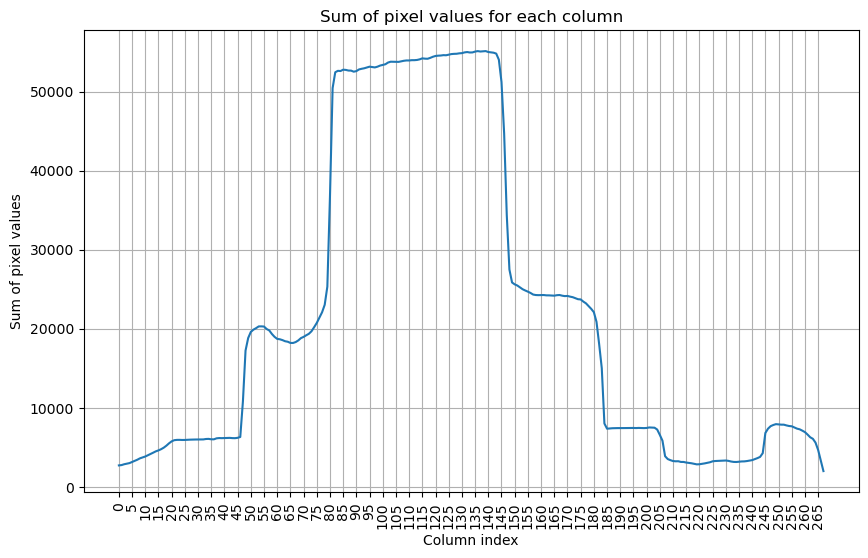

In [7]:
#here for each maze in each experiment we define a threshold pixel value for the area of the maze (blue, orange, neutral)

# List all mp4 files in the directory and subdirectories
input = Path("c:/Users/win/Desktop/Alice_Samara_Videos2") #CHANGE PATH HERE
videos = list(input.rglob("*.mp4"))

# for each video 
for video in videos:
    #Get the first frame of the video
    cap = cv2.VideoCapture(video.as_posix())
    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
    ret, frame = cap.read()
    cap.release()

    # Convert the image to grayscale if it's not already
    if len(frame.shape) == 3:  # Check if the image has color channels
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Calculate the sum of pixel values for each column (x-coordinate)
    column_pixel_sums = np.sum(frame, axis=0)

    # Create an array of x-coordinates
    x_values = np.arange(len(column_pixel_sums))

    # Create a new figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the pixel sums
    ax.plot(x_values, column_pixel_sums)

    # Add a grid
    ax.grid(True)

    # Set the x-ticks with an interval of 5
    ax.set_xticks(np.arange(min(x_values), max(x_values)+1, 5))

# Rotate x-axis labels
    plt.xticks(rotation=90)

    # Set the labels and title
    ax.set_xlabel('Column index')
    ax.set_ylabel('Sum of pixel values')
    ax.set_title('Sum of pixel values for each column')

    # Find peaks with a minimum distance of 55
    column_pixel_sums_1d = column_pixel_sums.flatten()

    # Find the boundaries of the high plateau
    # We can use a derivative approach to find sharp changes in the sum of pixel values
    diff = np.diff(column_pixel_sums_1d)

    # Plot the derivative to help choose a threshold
    plt.plot(diff)
    plt.xlabel('Column index')
    plt.ylabel('Difference in sum of pixel values')
    plt.title('Difference in sum of pixel values for each column')
    plt.grid(True)
    plt.show()




    threshold = 20000  # Define a threshold for detecting significant changes

    # Identify points where the difference crosses the threshold
    start_points = np.where(diff > threshold)[0]
    end_points = np.where(diff < -threshold)[0]

    # Assuming the first significant rise and fall correspond to the plateau boundaries
    plateau_start = start_points[0] + 1  # +1 to correct for the diff array offset
    plateau_end = end_points[0] + 1

    print(f"Plateau starts at column index: {plateau_start}")
    print(f"Plateau ends at column index: {plateau_end}")



    ''' peaks, properties = scipy.signal.find_peaks(column_pixel_sums_1d, height = (30_000, 70_000), distance=55)

    #it returns the indices of peaks in column_pixel_sums_1d that satisfy all given conditions
    #properties is a dictionary containing properties of the peaks and we are interested in the height of them

    # Get the heights of the peaks
    peak_heights = properties['peak_heights']

    # Sort the peaks by their heights in descending order and get the indices of the two highest peaks
    highest_peaks_indices = np.argsort(peak_heights)[-2:]

    # Get the x values of the two highest peaks
    highest_peaks_x_values = peaks[highest_peaks_indices]
    
    #plot red dots on the 2 highest peaks on the graph
    ax.plot(highest_peaks_x_values, column_pixel_sums[highest_peaks_x_values], 'ro')
    # Show the plot
    plt.show()

    #store the x values of the two highest peaks in a list that varies depending on the experiment, the arena and the maze (data contained in the video variable)
    #the list will be used to define the thresholds for the area of the maze in the next cell
    #the list is called thresholds'''

Plateau starts at column index: 80
Plateau ends at column index: 149


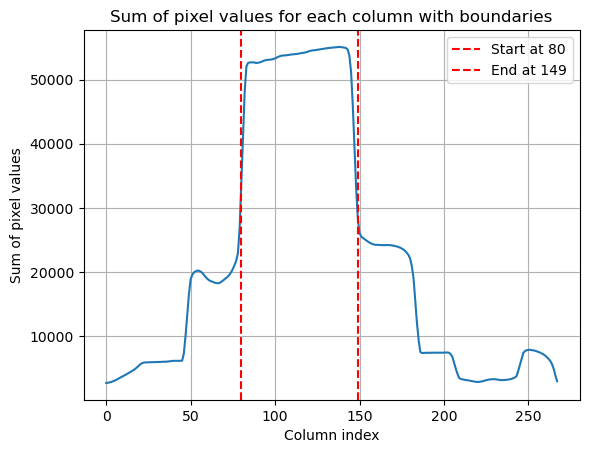

In [16]:
from scipy.ndimage import uniform_filter1d

# Apply a smoothing function to reduce noise
smoothed_sums = uniform_filter1d(column_pixel_sums_1d, size=4)


# Threshold for detecting the plateau
threshold = 30000
min_plateau_length = 40

# Find indices where the smoothed sums exceed the threshold
above_threshold = smoothed_sums > threshold

# Identify the start and end points of the plateau
plateau_start = None
plateau_end = None

for i in range(1, len(above_threshold)):
    if above_threshold[i] and not above_threshold[i-1]:
        start = i
    if not above_threshold[i] and above_threshold[i-1]:
        end = i
        if end - start >= min_plateau_length:
            plateau_start = start
            plateau_end = end
            break

print(f"Plateau starts at column index: {plateau_start}")
print(f"Plateau ends at column index: {plateau_end}")

# Mark the boundary points on the plot
plt.plot(smoothed_sums)
if plateau_start is not None and plateau_end is not None:
    plt.axvline(x=plateau_start, color='r', linestyle='--', label=f'Start at {plateau_start}')
    plt.axvline(x=plateau_end, color='r', linestyle='--', label=f'End at {plateau_end}')
plt.xlabel('Column index')
plt.ylabel('Sum of pixel values')
plt.title('Sum of pixel values for each column with boundaries')
plt.legend()
plt.grid(True)
plt.show()